In [1]:
import numpy as np
import pandas as pd
import json

%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
def analyse_results(params, vanilla_result, robust_result, robust_title, attack_name, param_symbol):
    
    vanilla_acc = vanilla_result["initial_acc"]
    vanilla_attack_accs = np.array(vanilla_result["attack_accs"])
    vanilla_fracs = vanilla_attack_accs / vanilla_acc
    
    df = {
        param_symbol: [0.0,] + params,
        'vanilla': [vanilla_acc,] + vanilla_attack_accs.tolist(),
    }
    columns = [param_symbol, "vanilla"]
    
    figure, axes = plt.subplots(nrows=int(np.ceil(len(robust_result) / 2)), ncols=2, figsize=(14, 14))

    for i, result in enumerate(robust_result):
        alpha = result["alpha"]
        robust_acc = result["initial_acc"]
        robust_attack_accs = np.array(result["attack_accs"])
        robust_fracs = robust_attack_accs / robust_acc

        col_name = "alpha = " + str(alpha)
        df[col_name] = [robust_acc,] + robust_attack_accs.tolist()
        columns.append(col_name)
        
        ax = axes[i // 2, i % 2]

        ax.plot(params, vanilla_fracs, label="Vanilla, acc = " + str(round(vanilla_acc, 4)))
        ax.grid()
        ax.plot(params, robust_fracs, label=robust_title + ", $\\alpha = " + str(alpha) + "$, acc = " + str(round(robust_acc, 4)))
        ax.set_xlabel("$\\" + param_symbol + "$")
        ax.set_ylabel("attack_accuracy / initial_accuracy")
        ax.legend()

    figure.delaxes(axes[-1][-1])
    figure.suptitle(attack_name + " attack, " + robust_title + " pooling", fontsize=16)
    plt.show() 
    
    df = pd.DataFrame(df, columns=columns)

    return df

## Gaussian Noise

In [15]:
with open('resnet_gn_full.json') as json_file:
    result_gn = json.load(json_file)

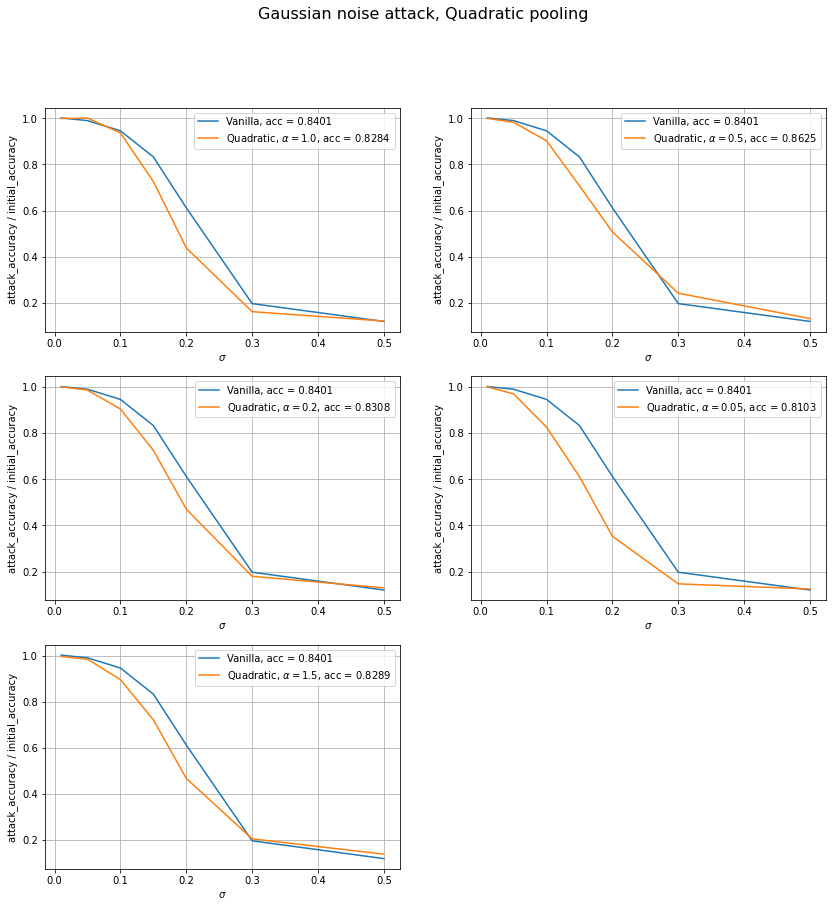

Gaussian noise attack, Quadratic pooling


,sigma,vanilla,alpha = 1.0,alpha = 0.5,alpha = 0.2,alpha = 0.05,alpha = 1.5
0,0.00,0.840078,0.828376,0.862506,0.830814,0.810336,0.828864
1,0.01,0.841541,0.827889,0.862506,0.831302,0.810824,0.825451
2,0.05,0.831789,0.829352,0.847879,0.819600,0.785958,0.815700
3,0.10,0.794734,0.776207,0.778645,0.751341,0.669430,0.742565
4,0.15,0.699659,0.601658,0.610434,0.602633,0.495368,0.598245
5,0.20,0.514383,0.363237,0.438323,0.391029,0.286202,0.387616
6,0.30,0.165773,0.134569,0.209166,0.149196,0.118966,0.170648
7,0.50,0.100926,0.100926,0.114091,0.107752,0.100926,0.115553


In [16]:
robust_title = "Quadratic"
attack_name = "Gaussian noise"

df = analyse_results(result_gn["sigmas"],
                     result_gn["models"]["vanilla"],
                     result_gn["models"]["quadratic"],
                     robust_title,
                     attack_name,
                     "sigma")

print(attack_name + " attack, " + robust_title + " pooling")
df

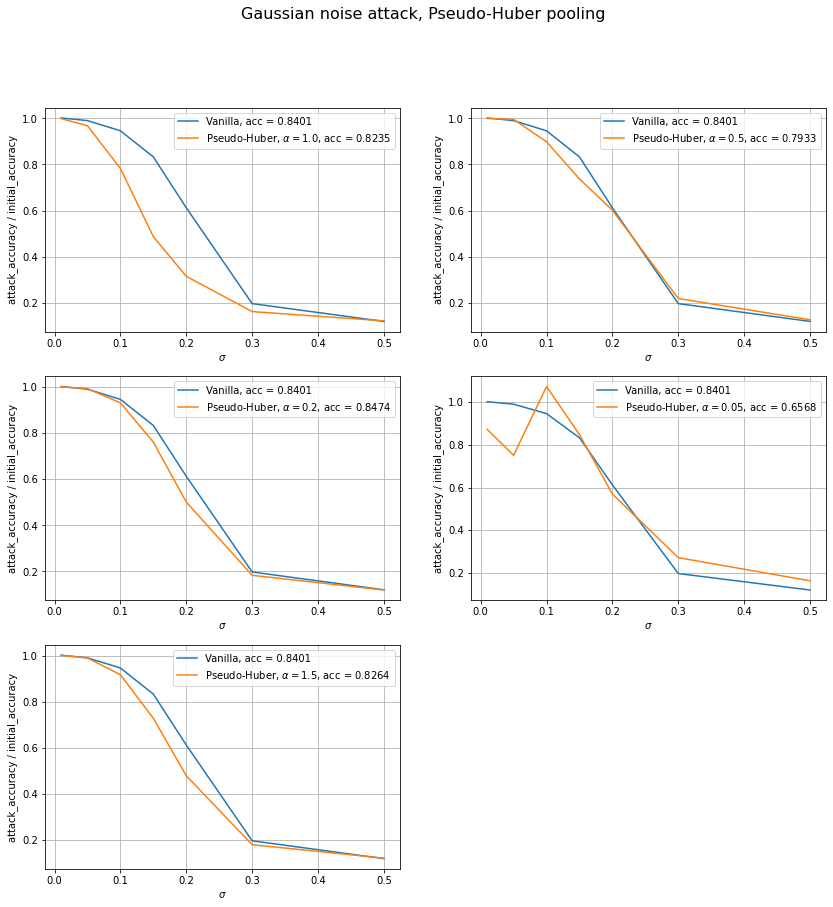

Gaussian noise attack, Pseudo-Huber pooling


,sigma,vanilla,alpha = 1.0,alpha = 0.5,alpha = 0.2,alpha = 0.05,alpha = 1.5
0,0.00,0.840078,0.823501,0.793272,0.847392,0.656753,0.826426
1,0.01,0.841541,0.822526,0.792784,0.848367,0.572891,0.826914
2,0.05,0.831789,0.797172,0.789859,0.841053,0.492930,0.817650
3,0.10,0.794734,0.644564,0.712823,0.788883,0.704534,0.757679
4,0.15,0.699659,0.401268,0.585080,0.644564,0.556802,0.601658
5,0.20,0.514383,0.259873,0.477328,0.424183,0.373964,0.395904
6,0.30,0.165773,0.134081,0.174061,0.155046,0.178450,0.149196
7,0.50,0.100926,0.100926,0.100926,0.100926,0.107265,0.100926


In [17]:
robust_title = "Pseudo-Huber"
attack_name = "Gaussian noise"

df = analyse_results(result_gn["sigmas"],
                     result_gn["models"]["vanilla"],
                     result_gn["models"]["pseudo-huber"],
                     robust_title,
                     attack_name,
                     "sigma")

print(attack_name + " attack, " + robust_title + " pooling")
df

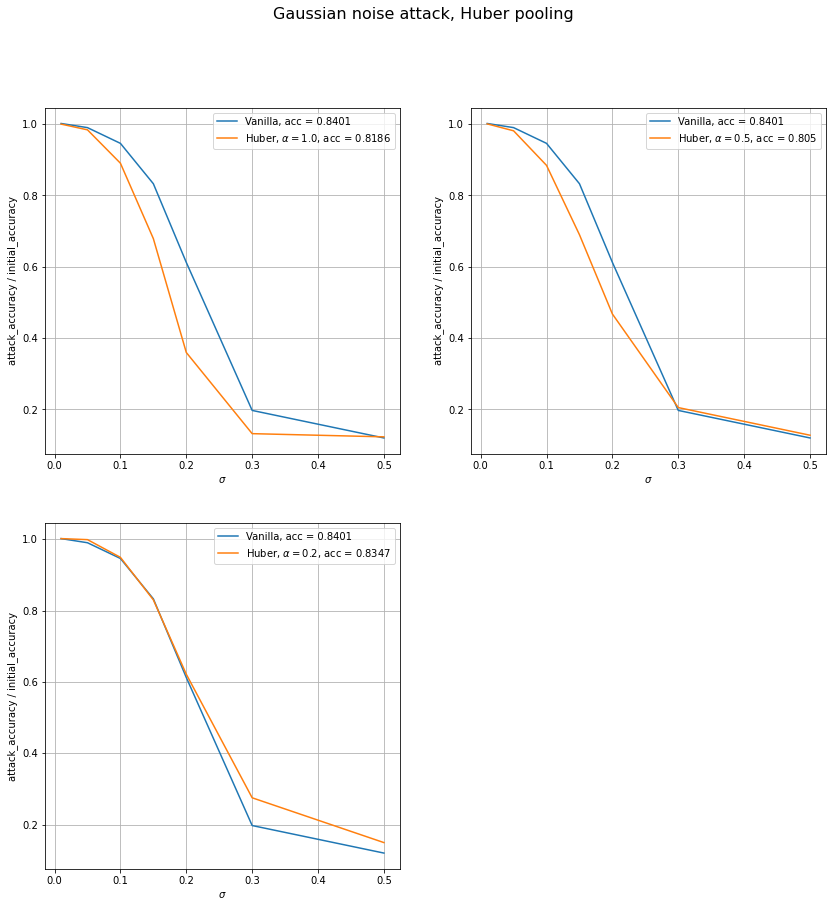

Gaussian noise attack, Huber pooling


,sigma,vanilla,alpha = 1.0,alpha = 0.5,alpha = 0.2,alpha = 1.5
0,0.00,0.840078,0.818625,0.804973,0.834715,0.844954
1,0.01,0.841541,0.818625,0.805461,0.836177,0.845929
2,0.05,0.831789,0.805461,0.789859,0.833740,0.837153
3,0.10,0.794734,0.728913,0.711848,0.792296,0.798147
4,0.15,0.699659,0.555826,0.555339,0.692833,0.683569
5,0.20,0.514383,0.294490,0.376402,0.518771,0.536811
6,0.30,0.165773,0.108240,0.165285,0.229644,0.333008
7,0.50,0.100926,0.100926,0.102877,0.124817,0.124817


In [18]:
robust_title = "Huber"
attack_name = "Gaussian noise"

df = analyse_results(result_gn["sigmas"],
                     result_gn["models"]["vanilla"],
                     result_gn["models"]["huber"],
                     robust_title,
                     attack_name,
                     "sigma")

print(attack_name + " attack, " + robust_title + " pooling")
df

## Fast Gradient Sign Method  (FGSM)

In [10]:
with open('resnet_fgsm_full.json') as json_file:
    result_fgsm = json.load(json_file)

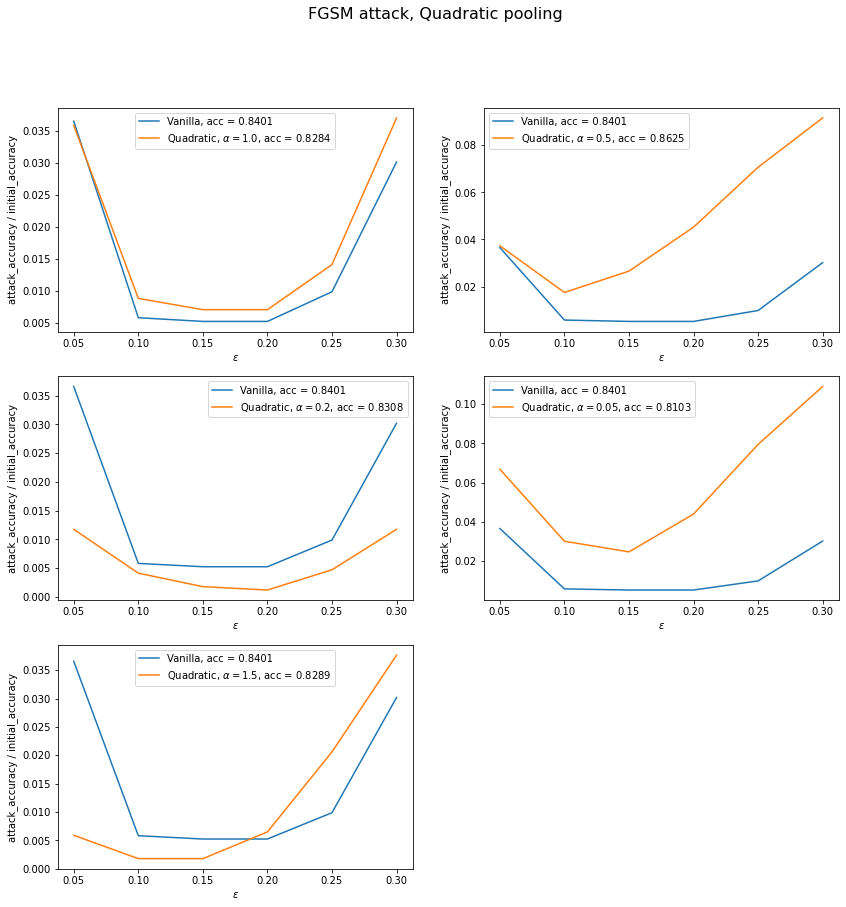

FGSM attack, Quadratic pooling


,epsilon,vanilla,alpha = 1.0,alpha = 0.5,alpha = 0.2,alpha = 0.05,alpha = 1.5
0,0.00,0.840078,0.828376,0.862506,0.830814,0.810336,0.828864
1,0.05,0.030717,0.029742,0.032179,0.009751,0.054120,0.004876
2,0.10,0.004876,0.007314,0.015115,0.003413,0.024378,0.001463
3,0.15,0.004388,0.005851,0.022916,0.001463,0.019990,0.001463
4,0.20,0.004388,0.005851,0.039005,0.000975,0.035592,0.005363
5,0.25,0.008289,0.011702,0.060946,0.003901,0.064359,0.017065
6,0.30,0.025353,0.030717,0.078986,0.009751,0.088250,0.031204


In [11]:
robust_title = "Quadratic"
attack_name = "FGSM"

df = analyse_results(result_fgsm["epsilons"],
                     result_fgsm["models"]["vanilla"],
                     result_fgsm["models"]["quadratic"],
                     robust_title,
                     attack_name,
                     "epsilon")

print(attack_name + " attack, " + robust_title + " pooling")
df

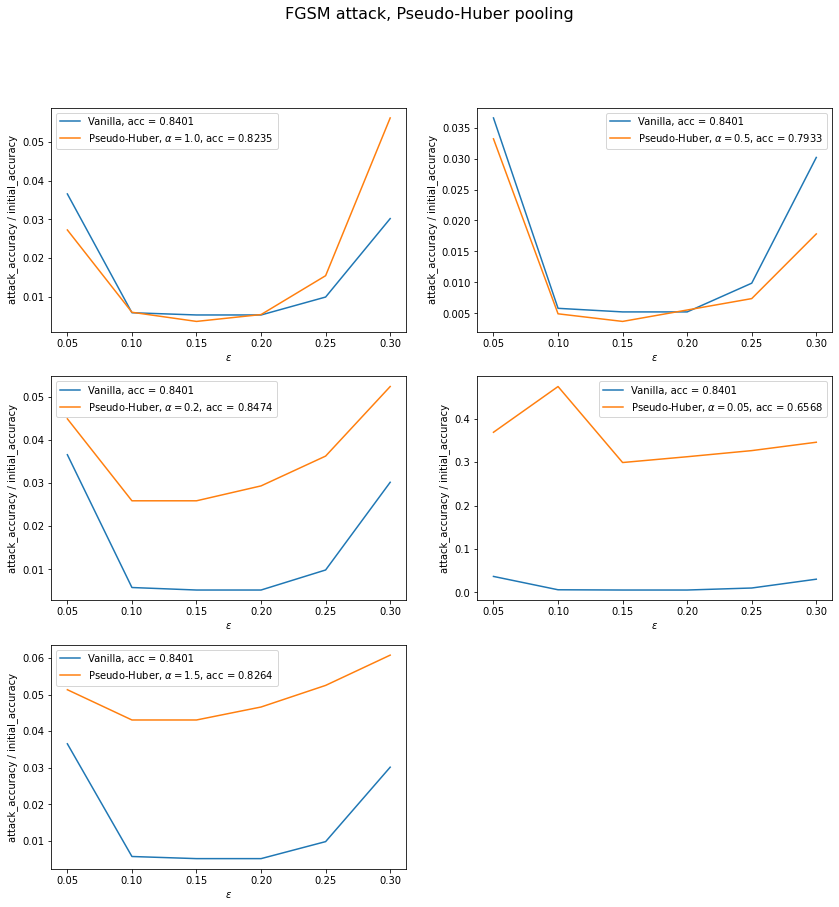

FGSM attack, Pseudo-Huber pooling


,epsilon,vanilla,alpha = 1.0,alpha = 0.5,alpha = 0.2,alpha = 0.05,alpha = 1.5
0,0.00,0.840078,0.823501,0.793272,0.847392,0.656753,0.826426
1,0.05,0.030717,0.022428,0.026329,0.038030,0.242321,0.042418
2,0.10,0.004876,0.004876,0.003901,0.021941,0.311555,0.035592
3,0.15,0.004388,0.002925,0.002925,0.021941,0.196490,0.035592
4,0.20,0.004388,0.004388,0.004388,0.024866,0.205266,0.038518
5,0.25,0.008289,0.012677,0.005851,0.030717,0.214529,0.043393
6,0.30,0.025353,0.046319,0.014139,0.044369,0.227206,0.050219


In [12]:
robust_title = "Pseudo-Huber"
attack_name = "FGSM"

df = analyse_results(result_fgsm["epsilons"],
                     result_fgsm["models"]["vanilla"],
                     result_fgsm["models"]["pseudo-huber"],
                     robust_title,
                     attack_name,
                     "epsilon")

print(attack_name + " attack, " + robust_title + " pooling")
df

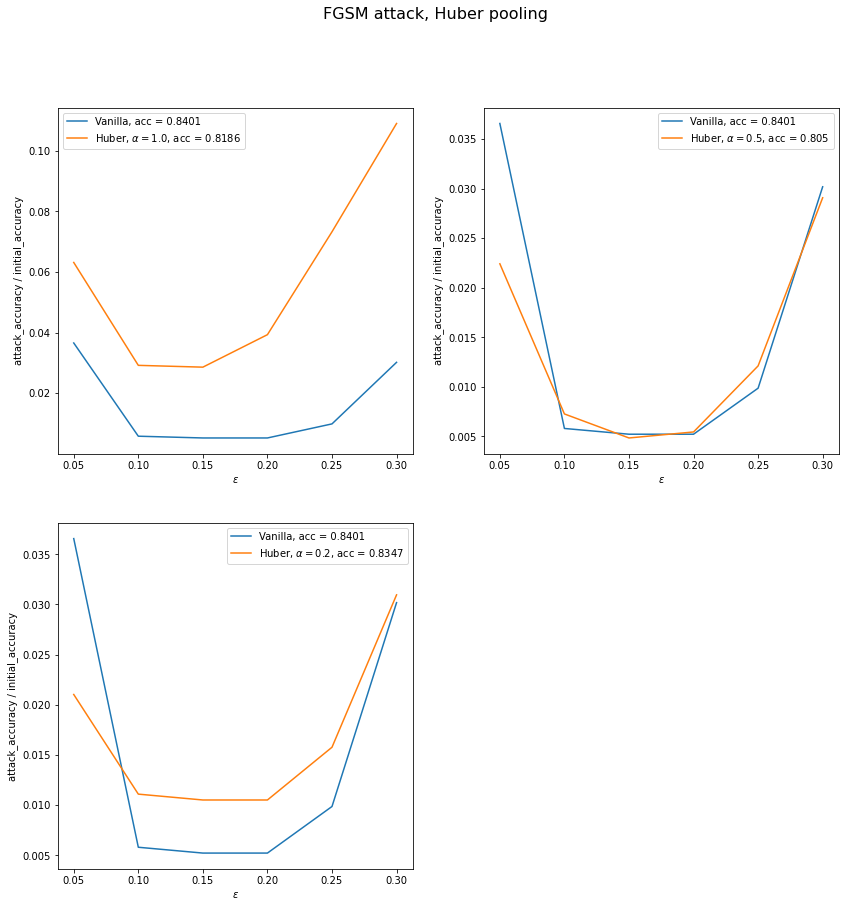

FGSM attack, Huber pooling


,epsilon,vanilla,alpha = 1.0,alpha = 0.5,alpha = 0.2,alpha = 1.5
0,0.00,0.840078,0.818625,0.804973,0.834715,0.844954
1,0.05,0.030717,0.051682,0.018040,0.017552,0.022916
2,0.10,0.004876,0.023891,0.005851,0.009264,0.003413
3,0.15,0.004388,0.023403,0.003901,0.008776,0.001950
4,0.20,0.004388,0.032179,0.004388,0.008776,0.001950
5,0.25,0.008289,0.059971,0.009751,0.013164,0.002925
6,0.30,0.025353,0.089225,0.023403,0.025841,0.004388


In [13]:
robust_title = "Huber"
attack_name = "FGSM"

df = analyse_results(result_fgsm["epsilons"],
                     result_fgsm["models"]["vanilla"],
                     result_fgsm["models"]["huber"],
                     robust_title,
                     attack_name,
                     "epsilon")

print(attack_name + " attack, " + robust_title + " pooling")
df